# OTMapper test

In [385]:
import OTMapOnto as maponto
import OTMapper as otmapper
import OTNeighborhood_TDA as mapneighbor
from rdflib import Graph

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
%%time
model_path="../model/crawl-300d-2M-subword.bin"
embs_model = maponto.load_embeddings(model_path, None)

INFO:root:Load pre-trained embeddings for about 10 mins if the model hasn't been load yet.
INFO:root:Loading the pre-trained Fasttext model...Please be patient...It may take about 10 mins to load...
INFO:gensim.models._fasttext_bin:loading 2000000 words for fastText model from ../model/crawl-300d-2M-subword.bin


Loading the pre-trained Fasttext model...Please be patient...It may take about 10 mins to load...


ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'DeutschHrvatskiEnglishDanskNederlandssuomiFran\xc3\xa7ais\xce\x95\xce\xbb\xce\xbb\xce'; replacing invalid characters, using 'DeutschHrvatskiEnglishDanskNederlandssuomiFrançaisΕλλ\\xce'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xe3\x81\x99\xe3\x81\xb9\xe3\x81\xa6\xe3\x81\xae\xe5\x9b\x9e\xe7\xad\x94\xe3\x82\x92\xe9\x9d\x9e\xe8\xa1\xa8\xe7\xa4\xba\xe3\x81\xab\xe3\x81\x99\xe3\x82\x8b\xe8\xb3\xaa\xe5\x95\x8f\xe3\x82\x92\xe5\x89\x8a\xe9\x99\xa4\xe3\x81\x97\xe3'; replacing invalid characters, using 'すべての回答を非表示にする質問を削除し\\xe3'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'00Z\xe9\x83\xa8\xe5\xb1\x8b\xe3\x82\xbf\xe3\x82\xa4\xe3\x83\x97\xe3\x81\xbe\xe3\x82\x8b\xe3\x81\xbe\xe3\x82\x8b\xe8\xb2\xb8\xe5\x88\x87\xe5\xbb\xba\xe7\x89\xa9\xe3\x82\xbf\xe3\x82\xa4\xe3\x83\x97\xe4\xb8\x80\xe8\xbb\x92\xe5'; replacing invalid characters, using '00Z部屋タイプまるまる貸切建物タイプ一軒\\xe5'
E

Completed loading the pre-trained Fasttext model.
CPU times: user 3min 55s, sys: 11.7 s, total: 4min 7s
Wall time: 4min 7s


In [4]:
mapper = otmapper.Mapper(embs_model)

# MSE Benchmark

In [322]:
import importlib
importlib.reload(maponto)
importlib.reload(mapneighbor)
importlib.reload(otmapper)

INFO:root:logging info test


<module 'OTMapper' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py'>

In [66]:
source_url = "../data/MSE-Benchmark/testCases/firstTestCase/MaterialInformation-Reduced.owl"
target_url = "../data/MSE-Benchmark/testCases/firstTestCase/MatOnto.owl"
output_url = '../data/results/MSE_firstTest_case_alignments.rdf'
refs_url = "../data/MSE-Benchmark/testCases/firstTestCase/RefAlign1.rdf"

In [67]:
mapper.align(source_url, target_url, output_url)

INFO:root:Python ensemble mapper info: map ../data/MSE-Benchmark/testCases/firstTestCase/MaterialInformation-Reduced.owl to ../data/MSE-Benchmark/testCases/firstTestCase/MatOnto.owl
INFO:root:Read source with 309 triples.


../data/MSE-Benchmark/testCases/firstTestCase/MaterialInformation-Reduced.owl
../data/MSE-Benchmark/testCases/firstTestCase/MatOnto.owl


INFO:root:Read target with 11363 triples.
INFO:root:MAP CONCEPTS
INFO:root:The number of level_1 predicted mapping is 2.
INFO:root:Retrieving Synsets by WordNet...
INFO:root:The number of level_2 predicted mapping is 5
INFO:root:Compute the related words for each source concept....
25it [00:00, 54.04it/s]
INFO:root:Total number of source concepts computed with relatd words is 25
INFO:root:Compute the related words for each target concept....
820it [00:17, 47.73it/s]
INFO:root:Total number of target concepts computed with related words is 818
100%|██████████| 25/25 [00:00<00:00, 268.50it/s]
INFO:root:The number of level_3 predicted mapping is 10
INFO:root:Compute Pairwise Wasserstein Distances...
100%|██████████| 15/15 [00:15<00:00,  1.02s/it]
INFO:root:The number of level_4 predicted mapping is 2
INFO:root:Skip level_5 mapping.
INFO:root:Matching Label Embeddings by Optimal Transport...
INFO:root:Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:The

INFO:root:Compute the related words for each source concept....
9it [00:00, 57.82it/s]
INFO:root:Total number of source concepts computed with relatd words is 9
INFO:root:Compute the related words for each target concept....
80it [00:01, 52.08it/s]
INFO:root:Total number of target concepts computed with related words is 80
100%|██████████| 9/9 [00:00<00:00, 2569.86it/s]
INFO:root:The number of level_3 predicted mapping is 2
INFO:root:Skip the level_4 mapping.
INFO:root:Skip the level_5 mapping.
INFO:root:Skip the level_6 mappping.
INFO:root:TOTAL NUMBER OF MAPPINGS BETWEEN OBJECT PROPERTIES IS 4
INFO:root:========================================================
INFO:root:MAP DATATYPE PROPERTIES
INFO:root:Retrieving Synsets by WordNet...
INFO:root:Compute the related words for each source concept....
32it [00:00, 55.12it/s]
INFO:root:Total number of source concepts computed with relatd words is 32
INFO:root:Compute the related words for each target concept....
13it [00:00, 44.87it/s]
IN

In [68]:
preds = maponto.load_alignments(output_url, None)
maponto.evaluate(preds, refs_url)

Total number of None is 39
Total number of references is 23
Total correctly predicted alignments is 9
Total number of predicted is 39
Precision is 0.23076923076923078
Recall is 0.391304347826087
F1-Measure is 0.2903225806451613


In [69]:
source_url = "../data/MSE-Benchmark/testCases/secondTestCase/MaterialInformation.owl"
target_url = "../data/MSE-Benchmark/testCases/secondTestCase/MatOnto.owl"
output_url = '../data/results/MSE_secondTest_case_alignments.rdf'
refs_url = "../data/MSE-Benchmark/testCases/secondTestCase/RefAlign2.rdf"

In [70]:
mapper.align(source_url, target_url, output_url)

INFO:root:Python ensemble mapper info: map ../data/MSE-Benchmark/testCases/secondTestCase/MaterialInformation.owl to ../data/MSE-Benchmark/testCases/secondTestCase/MatOnto.owl


../data/MSE-Benchmark/testCases/secondTestCase/MaterialInformation.owl


INFO:root:Read source with 2350 triples.


../data/MSE-Benchmark/testCases/secondTestCase/MatOnto.owl


INFO:root:Read target with 11362 triples.
INFO:root:MAP CONCEPTS
INFO:root:The number of level_1 predicted mapping is 59.
INFO:root:Retrieving Synsets by WordNet...
INFO:root:The number of level_2 predicted mapping is 209
INFO:root:Compute the related words for each source concept....
362it [00:06, 55.32it/s]
INFO:root:Total number of source concepts computed with relatd words is 362
INFO:root:Compute the related words for each target concept....
643it [00:12, 52.36it/s]
INFO:root:Total number of target concepts computed with related words is 641
100%|██████████| 362/362 [00:01<00:00, 324.94it/s]
INFO:root:The number of level_3 predicted mapping is 67
INFO:root:Compute Pairwise Wasserstein Distances...
100%|██████████| 295/295 [03:38<00:00,  1.35it/s]
INFO:root:The number of level_4 predicted mapping is 10
INFO:root:Skip level_5 mapping.
INFO:root:Matching Label Embeddings by Optimal Transport...
INFO:root:Computing the Ground Embedding Costs between the Source and Target Points...
INF

In [46]:
preds = maponto.load_alignments(output_url, None)
maponto.evaluate(preds, refs_url)

Total number of None is 413
Total number of references is 63
Total correctly predicted alignments is 57
Total number of predicted is 413
Precision is 0.13801452784503632
Recall is 0.9047619047619048
F1-Measure is 0.23949579831932774


In [43]:
source_url = "../data/MSE-Benchmark/testCases/thirdTestCase/MaterialInformation.owl"
target_url = "../data/MSE-Benchmark/testCases/thirdTestCase/EMMO.owl"
output_url = '../data/results/MSE_thirdTest_case_alignments.rdf'
refs_url = "../data/MSE-Benchmark/testCases/thirdTestCase/RefAlign3.rdf"

In [44]:
mapper.align(source_url, target_url, output_url)

INFO:root:Python ensemble mapper info: map ../data/MSE-Benchmark/testCases/thirdTestCase/MaterialInformation.owl to ../data/MSE-Benchmark/testCases/thirdTestCase/EMMO.owl


../data/MSE-Benchmark/testCases/thirdTestCase/MaterialInformation.owl


INFO:root:Read source with 2350 triples.


../data/MSE-Benchmark/testCases/thirdTestCase/EMMO.owl
http://emmo.info/emmo/1.0.0-alpha2/middle/isq
http://emmo.info/emmo/1.0.0-alpha2/middle/metrology
http://emmo.info/emmo/1.0.0-alpha2/middle/math
http://emmo.info/emmo/1.0.0-alpha2/middle/reductionistic
http://emmo.info/emmo/1.0.0-alpha2/middle/materials
http://emmo.info/emmo/1.0.0-alpha2/middle/models
http://emmo.info/emmo/1.0.0-alpha2/top
http://emmo.info/emmo/1.0.0-alpha2/top/physical
http://emmo.info/emmo/1.0.0-alpha2/top/mereotopology
http://emmo.info/emmo/1.0.0-alpha2/top/annotations
http://emmo.info/emmo/1.0.0-alpha2/middle/physicalistic
http://emmo.info/emmo/1.0.0-alpha2/middle/siunits
http://emmo.info/emmo/1.0.0-alpha2/middle/properties
http://emmo.info/emmo/1.0.0-alpha2/middle/perceptual
http://emmo.info/emmo/1.0.0-alpha2/middle/holistic
http://emmo.info/emmo/1.0.0-alpha2/middle/manufacturing
http://emmo.info/emmo/1.0.0-alpha2/middle/semiotics
http://emmo.info/emmo/1.0.0-alpha2/middle/units-extension


INFO:root:Read target with 4644 triples.
INFO:root:MAP CONCEPTS
INFO:root:The number of level_1 predicted mapping is 52.
INFO:root:Retrieving Synsets by WordNet...
INFO:root:The number of level_2 predicted mapping is 87
INFO:root:Compute the related words for each source concept....
445it [00:08, 50.18it/s]
INFO:root:Total number of source concepts computed with relatd words is 445
INFO:root:Compute the related words for each target concept....
158it [00:03, 52.05it/s]WARNING:rdflib.term:http://emmo.info/emmo#EMMO_28fbea28_2204_4613_87ff_6d877b855fcd  does not look like a valid URI, trying to serialize this will break.
357it [00:07, 50.71it/s]
INFO:root:Total number of target concepts computed with related words is 357
100%|██████████| 445/445 [00:00<00:00, 550.82it/s]
INFO:root:The number of level_3 predicted mapping is 55
INFO:root:Compute Pairwise Wasserstein Distances...
100%|██████████| 390/390 [02:00<00:00,  3.24it/s]
INFO:root:The number of level_4 predicted mapping is 7
INFO:ro

INFO:root:The number of level_6 predicted mapping is 209
INFO:root:TOTAL NUMBER OF MAPPINGS BETWEEN CONCPETS IS 410
INFO:root:=================================================
INFO:root:MAP OBJECT PROPERTIES
INFO:root:Retrieving Synsets by WordNet...
INFO:root:Compute the related words for each source concept....
28it [00:00, 56.14it/s]
INFO:root:Total number of source concepts computed with relatd words is 28
INFO:root:Compute the related words for each target concept....
31it [00:00, 48.12it/s]
INFO:root:Total number of target concepts computed with related words is 31
100%|██████████| 28/28 [00:00<00:00, 3728.03it/s]
INFO:root:The number of level_3 predicted mapping is 2
INFO:root:Skip the level_4 mapping.
INFO:root:Skip the level_5 mapping.
INFO:root:Skip the level_6 mappping.
INFO:root:TOTAL NUMBER OF MAPPINGS BETWEEN OBJECT PROPERTIES IS 2
INFO:root:========================================================
INFO:root:MAP DATATYPE PROPERTIES
INFO:root:Retrieving Synsets by WordNet..

In [45]:
preds = maponto.load_alignments(output_url, None)
maponto.evaluate(preds, refs_url)

Total number of None is 413
Total number of references is 63
Total correctly predicted alignments is 57
Total number of predicted is 413
Precision is 0.13801452784503632
Recall is 0.9047619047619048
F1-Measure is 0.23949579831932774


In [63]:
aligns = maponto.load_alignments(output_url, None)

Total number of None is 413


In [64]:
aligns.iloc[1]

source        http://codata.jp/OML-MaterialInformation#Amoun...
target        http://emmo.info/emmo/middle/isq#EMMO_8159c26a...
relation                                                      =
confidence                                                  1.0
Name: 1, dtype: object

In [65]:
refs = maponto.load_alignments(refs_url, None)
refs

Total number of None is 63


,source,target,relation,confidence
0,http://codata.jp/OML-MaterialInformation#Energy,http://emmo.info/emmo/middle/isq#EMMO_31ec09ba...,=,0.9306
1,http://codata.jp/OML-MaterialInformation#Illum...,http://emmo.info/emmo/middle/isq#EMMO_b51fbd00...,=,0.9306
2,http://codata.jp/OML-MaterialInformation#Density,http://emmo.info/emmo/middle/isq#EMMO_06448f64...,=,0.9306
3,http://codata.jp/OML-MaterialInformation#Lumin...,http://emmo.info/emmo/middle/isq#EMMO_e2ee1c98...,=,0.9306
4,http://codata.jp/OML-MaterialInformation#Magne...,http://emmo.info/emmo/middle/isq#EMMO_3b931698...,=,0.9306
...,...,...,...,...
58,http://codata.jp/OML-MaterialInformation#Elect...,http://emmo.info/emmo/middle/isq#EMMO_e150fa8d...,=,1.0
59,http://codata.jp/OML-MaterialInformation#SI_units,http://emmo.info/emmo/middle/siunits#EMMO_feb0...,=,1.0
60,http://codata.jp/OML-MaterialInformation#CGS_u...,http://emmo.info/emmo/middle/units-extension#E...,=,1.0
61,http://codata.jp/OML-MaterialInformation#WaveN...,http://emmo.info/emmo/middle/isq#EMMO_d859588d...,=,1.0


In [58]:
target_graph = Graph()
stack_urls = []
visited_urls = []
stack_urls.append(target_url)
maptonto.parse_owl_withImports(target_graph, stack_urls, visited_urls)
len(target_graph)

../data/MSE-Benchmark/testCases/thirdTestCase/EMMO.owl
http://emmo.info/emmo/1.0.0-alpha2/middle/properties
http://emmo.info/emmo/1.0.0-alpha2/middle/reductionistic
http://emmo.info/emmo/1.0.0-alpha2/middle/materials
http://emmo.info/emmo/1.0.0-alpha2/middle/isq
http://emmo.info/emmo/1.0.0-alpha2/middle/metrology
http://emmo.info/emmo/1.0.0-alpha2/middle/math
http://emmo.info/emmo/1.0.0-alpha2/middle/manufacturing
http://emmo.info/emmo/1.0.0-alpha2/top
http://emmo.info/emmo/1.0.0-alpha2/top/physical
http://emmo.info/emmo/1.0.0-alpha2/top/mereotopology
http://emmo.info/emmo/1.0.0-alpha2/top/annotations
http://emmo.info/emmo/1.0.0-alpha2/middle/siunits
http://emmo.info/emmo/1.0.0-alpha2/middle/units-extension
http://emmo.info/emmo/1.0.0-alpha2/middle/semiotics
http://emmo.info/emmo/1.0.0-alpha2/middle/holistic
http://emmo.info/emmo/1.0.0-alpha2/middle/models
http://emmo.info/emmo/1.0.0-alpha2/middle/physicalistic
http://emmo.info/emmo/1.0.0-alpha2/middle/perceptual


4644

# Retrieve skos:prefLabel

In [59]:
maponto.extract_label_uris(target_graph)

,label,uri
0,Holistic,http://emmo.info/emmo/middle/holistic#EMMO_027...
1,Process,http://emmo.info/emmo/middle/holistic#EMMO_43e...
2,Participant,http://emmo.info/emmo/middle/holistic#EMMO_498...
3,TimeDimension,http://emmo.info/emmo/middle/isq#EMMO_02e894c3...
4,Velocity,http://emmo.info/emmo/middle/isq#EMMO_0329f1f5...
...,...,...
445,EMMO,http://emmo.info/emmo/top/mereotopology#EMMO_8...
446,Item,http://emmo.info/emmo/top/mereotopology#EMMO_e...
447,Elementary,http://emmo.info/emmo/top/physical#EMMO_0f795e...
448,Void,http://emmo.info/emmo/top/physical#EMMO_29072e...


In [45]:
#target_url = "../data/anatomy_track/anatomy_track-default/mouse-human-suite/target.rdf"
target_url = "../data/MSE-Benchmark/testCases/thirdTestCase/EMMO.owl"

In [46]:
target_graph = Graph()
stack_urls = []
stack_urls.append(target_url)
visited_urls = []
maponto.parse_owl_withImports(target_graph, stack_urls, visited_urls)

../data/MSE-Benchmark/testCases/thirdTestCase/EMMO.owl
http://emmo.info/emmo/1.0.0-alpha2/middle/semiotics
http://emmo.info/emmo/1.0.0-alpha2/middle/manufacturing
http://emmo.info/emmo/1.0.0-alpha2/top
http://emmo.info/emmo/1.0.0-alpha2/top/physical
http://emmo.info/emmo/1.0.0-alpha2/top/mereotopology
http://emmo.info/emmo/1.0.0-alpha2/top/annotations
http://emmo.info/emmo/1.0.0-alpha2/middle/properties
http://emmo.info/emmo/1.0.0-alpha2/middle/isq
http://emmo.info/emmo/1.0.0-alpha2/middle/metrology
http://emmo.info/emmo/1.0.0-alpha2/middle/math
http://emmo.info/emmo/1.0.0-alpha2/middle/models
http://emmo.info/emmo/1.0.0-alpha2/middle/reductionistic
http://emmo.info/emmo/1.0.0-alpha2/middle/materials
http://emmo.info/emmo/1.0.0-alpha2/middle/physicalistic
http://emmo.info/emmo/1.0.0-alpha2/middle/holistic
http://emmo.info/emmo/1.0.0-alpha2/middle/perceptual
http://emmo.info/emmo/1.0.0-alpha2/middle/siunits
http://emmo.info/emmo/1.0.0-alpha2/middle/units-extension


In [47]:
len(target_graph)

4644

In [48]:
from rdflib.namespace import Namespace, NamespaceManager
SKOS_NS = Namespace("http://www.w3.org/2004/02/skos/core#")
target_graph.namespace_manager.bind("skos", SKOS_NS)
    
def_query = '''SELECT DISTINCT ?a ?b
                   WHERE {
                   {?a a owl:Class .
                   ?a rdfs:label ?b .
                   }
                   UNION
                   {?a a owl:Class .
                   ?a skos:prefLabel ?b .
                   }
                   
                   FILTER(!isBlank(?a))}
                   
                   ORDER BY ?a
            '''
    
q_res = target_graph.query(def_query)

labels = []
uris = []
for res in q_res:
    if len(str(res[1])) > 0:
        labels.append(str(res[1]))
        uris.append(str(res[0]))

In [52]:
labels[:5]

['Holistic', 'Process', 'Participant', 'TimeDimension', 'Velocity']

# Anatomy

In [47]:
source_url = "../data/anatomy_track/anatomy_track-default/mouse-human-suite/source.rdf"
target_url = "../data/anatomy_track/anatomy_track-default/mouse-human-suite/target.rdf"
output_url = '../data/results/mouse_human_alignments.rdf'
refs_url = "../data/anatomy_track/anatomy_track-default/mouse-human-suite/reference.rdf"

In [48]:
mapper.align(source_url, target_url, output_url)

INFO:root:Python ensemble mapper info: map ../data/anatomy_track/anatomy_track-default/mouse-human-suite/source.rdf to ../data/anatomy_track/anatomy_track-default/mouse-human-suite/target.rdf


../data/anatomy_track/anatomy_track-default/mouse-human-suite/source.rdf


INFO:root:Read source with 15958 triples.


../data/anatomy_track/anatomy_track-default/mouse-human-suite/target.rdf


INFO:root:Read target with 35354 triples.
INFO:root:MAP CONCEPTS
INFO:root:The number of level_1 predicted mapping is 951.
INFO:root:Retrieving Synsets by WordNet...
INFO:root:The number of level_2 predicted mapping is 32
INFO:root:Skip the level_3 mapping.
INFO:root:Skip the level_4 mapping.
INFO:root:Skip the level_5 mapping.
INFO:root:Matching Label Embeddings by Optimal Transport...
INFO:root:Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:The shape of the cost matrix is (1757, 2315)
INFO:root:Computing Optimal Transport Plan...
INFO:root:Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:Making Mappings from a Pairwise OT Plan Matrix by Mutual NN...
INFO:root:The number of level_6 predicted mapping is 920
INFO:root:TOTAL NUMBER OF MAPPINGS BETWEEN CONCPETS IS 1903
INFO:root:=================================================
INFO:root:MAP OBJECT PROPERTIES
INFO:root:The number of level_1 predicted mapping is 2.
INFO:root:Retr

In [49]:
preds = maponto.load_alignments(output_url, None)
maponto.evaluate(preds, refs_url)

Total number of None is 1905
Total number of references is 1516
Total correctly predicted alignments is 1230
Total number of predicted is 1905
Precision is 0.6456692913385826
Recall is 0.8113456464379947
F1-Measure is 0.7190879859690149


# Conference

In [12]:
source_url = "../data/conference/conference-v1/cmt-conference/source.rdf"
target_url = "../data/conference/conference-v1/cmt-conference/target.rdf"
output_url = '../data/results/cmt_conference_alignments.rdf'
refs_url = "../data/conference/conference-v1/cmt-conference/reference.rdf"
mapper.align(source_url, target_url, output_url)
preds = maponto.load_alignments(output_url, None)
maponto.evaluate(preds, refs_url)

INFO:root:Python ensemble mapper info: map ../data/conference/conference-v1/cmt-conference/source.rdf to ../data/conference/conference-v1/cmt-conference/target.rdf
INFO:root:Read source with 412 triples.


../data/conference/conference-v1/cmt-conference/source.rdf
../data/conference/conference-v1/cmt-conference/target.rdf


INFO:root:Read target with 639 triples.
INFO:root:MAP CONCEPTS
INFO:root:The number of level_1 predicted mapping is 6.
INFO:root:Retrieving Synsets by WordNet...
INFO:root:The number of level_2 predicted mapping is 1
INFO:root:Compute the related words for each source concept....
22it [00:00, 53.21it/s]
INFO:root:Total number of source concepts computed with relatd words is 22
INFO:root:Compute the related words for each target concept....
52it [00:01, 47.25it/s]
INFO:root:Total number of target concepts computed with related words is 52
100%|██████████| 22/22 [00:00<00:00, 3021.54it/s]
INFO:root:The number of level_3 predicted mapping is 7
INFO:root:Compute Pairwise Wasserstein Distances...
100%|██████████| 15/15 [00:00<00:00, 17.66it/s]
INFO:root:The number of level_4 predicted mapping is 1
INFO:root:Skip level_5 mapping.
INFO:root:Matching Label Embeddings by Optimal Transport...
INFO:root:Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:The sha

48it [00:01, 46.04it/s]
INFO:root:Total number of source concepts computed with relatd words is 48
INFO:root:Compute the related words for each target concept....
45it [00:00, 56.02it/s]
INFO:root:Total number of target concepts computed with related words is 45
100%|██████████| 48/48 [00:00<00:00, 3770.94it/s]
INFO:root:The number of level_3 predicted mapping is 6
INFO:root:Skip the level_4 mapping.
INFO:root:Skip the level_5 mapping.
INFO:root:Skip the level_6 mappping.
INFO:root:TOTAL NUMBER OF MAPPINGS BETWEEN OBJECT PROPERTIES IS 7
INFO:root:========================================================
INFO:root:MAP DATATYPE PROPERTIES
INFO:root:The number of level_1 predicted mapping is 2.
INFO:root:Retrieving Synsets by WordNet...
INFO:root:Compute the related words for each source concept....
8it [00:00, 56.19it/s]
INFO:root:Total number of source concepts computed with relatd words is 8
INFO:root:Compute the related words for each target concept....
16it [00:00, 47.04it/s]
INFO:roo

Total number of None is 39
Total number of references is 15
Total correctly predicted alignments is 10
Total number of predicted is 39
Precision is 0.2564102564102564
Recall is 0.6666666666666666
F1-Measure is 0.37037037037037035


In [14]:
source_graph = Graph()
stack_urls = []
visited_urls = []
stack_urls.append(source_url)
maponto.parse_owl_withImports(source_graph, stack_urls, visited_urls)
#len(source_graph)
target_graph = Graph()
stack_urls = []
visited_urls = []
stack_urls.append(target_url)
maponto.parse_owl_withImports(target_graph, stack_urls, visited_urls)
len(source_graph), len(target_graph)

../data/conference/conference-v1/cmt-conference/source.rdf
../data/conference/conference-v1/cmt-conference/target.rdf


(412, 639)

In [19]:
refs_df = maponto.load_alignments(refs_url, None)
refs_df

Total number of None is 15


,source,target,relation,confidence
0,http://cmt#Conference,http://conference#Conference_volume,=,1.0
1,http://cmt#Preference,http://conference#Review_preference,=,1.0
2,http://cmt#Author,http://conference#Regular_author,=,1.0
3,http://cmt#Person,http://conference#Person,=,1.0
4,http://cmt#email,http://conference#has_an_email,=,1.0
5,http://cmt#Co-author,http://conference#Contribution_co-author,=,1.0
6,http://cmt#PaperAbstract,http://conference#Abstract,=,1.0
7,http://cmt#Document,http://conference#Conference_document,=,1.0
8,http://cmt#Review,http://conference#Review,=,1.0
9,http://cmt#Conference,http://conference#Conference,=,1.0


In [20]:
preds_df = maponto.load_alignments(output_url, None)
preds_df

Total number of None is 39


,source,target,relation,confidence
0,http://cmt#Conference,http://conference#Conference,=,1.0
1,http://cmt#Paper,http://conference#Paper,=,1.0
2,http://cmt#Person,http://conference#Person,=,1.0
3,http://cmt#ProgramCommittee,http://conference#Program_committee,=,1.0
4,http://cmt#Review,http://conference#Review,=,1.0
5,http://cmt#Reviewer,http://conference#Reviewer,=,1.0
6,http://cmt#Chairman,http://conference#Chair,=,1.0
7,http://cmt#Author,http://conference#Regular_author,=,1.0
8,http://cmt#Co-author,http://conference#Contribution_co-author,=,1.0
9,http://cmt#ConferenceChair,http://conference#Co-chair,=,1.0


In [22]:
relation_graph = maponto.build_relation_graph(source_graph)
relation_graph

INFO:root:Building a relation graph from the given RDF triple graph...


,subject,predicate,object
0,http://cmt#Paper,http://cmt#readByReviewer,http://cmt#Reviewer
1,http://cmt#ExternalReviewer,http://cmt#assignedByReviewer,http://cmt#Reviewer
2,http://cmt#Paper,http://cmt#readByMeta-Reviewer,http://cmt#Meta-Reviewer
3,http://cmt#Paper,http://cmt#hasDecision,http://cmt#Decision
4,http://cmt#Paper,http://cmt#hasDecision,http://cmt#Decision
5,http://cmt#AuthorNotReviewer,rdfs:subClassOf,http://cmt#Author
6,http://cmt#Administrator,rdfs:subClassOf,http://cmt#User
7,http://cmt#Meta-Reviewer,rdfs:subClassOf,http://cmt#Reviewer
8,http://cmt#ExternalReviewer,rdfs:subClassOf,http://cmt#Person
9,http://cmt#Rejection,rdfs:subClassOf,http://cmt#Decision


# For a URI in an RDF graph, extract all related classes and properties

In [323]:
importlib.reload(maponto)

<module 'OTMapOnto' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapOnto.py'>

In [324]:
maponto.query_superClasses("http://cmt#Review", source_graph)

(['rdfs:subClassOf'], ['http://cmt#Document'], ['child'])

In [325]:
maponto.query_subClasses("http://cmt#User", source_graph)

(['superClassOf', 'superClassOf', 'superClassOf'],
 ['http://cmt#Author', 'http://cmt#Reviewer', 'http://cmt#Administrator'],
 ['parent', 'parent', 'parent'])

In [326]:
maponto.query_relations_someValuesFrom("http://conference#Review_expertise", target_graph)

(['http://conference#has_a_submitted_contribution',
  'http://conference#belongs_to_reviewers'],
 ['http://conference#Submitted_contribution', 'http://conference#Reviewer'],
 ['someValuesFrom', 'someValuesFrom'])

In [327]:
maponto.query_relations_allValuesFrom("http://conference#Review", target_graph)

(['http://conference#has_authors'],
 ['http://conference#Reviewer'],
 ['allValuesFrom'])

In [328]:
maponto.query_relations_minCardinality("http://cmt#Paper", source_graph)

(['http://cmt#readByReviewer', 'http://cmt#hasDecision'],
 [1, 0],
 ['owl:minCardinality', 'owl:minCardinality'])

In [329]:
maponto.query_relations_maxCardinality("http://cmt#Paper", source_graph)

(['http://cmt#readByMeta-Reviewer', 'http://cmt#hasDecision'],
 [1, 1],
 ['owl:maxCardinality', 'owl:maxCardinality'])

In [330]:
maponto.query_relations_asDomains("http://cmt#Paper", source_graph)

(['http://cmt#readByReviewer',
  'http://cmt#readByMeta-Reviewer',
  'http://cmt#hasDecision',
  'http://cmt#hasDecision',
  'http://cmt#acceptedBy',
  'http://cmt#readByMeta-Reviewer',
  'http://cmt#hasDecision',
  'http://cmt#assignedTo',
  'http://cmt#rejectedBy',
  'http://cmt#hasSubjectArea',
  'http://cmt#readByReviewer',
  'http://cmt#hasCo-author',
  'http://cmt#hasAuthor',
  'http://cmt#hasBid'],
 ['http://cmt#Reviewer',
  'http://cmt#Meta-Reviewer',
  'http://cmt#Decision',
  'http://cmt#Decision',
  'http://cmt#Administrator',
  'http://cmt#Meta-Reviewer',
  'http://cmt#Decision',
  'http://cmt#Reviewer',
  'http://cmt#Administrator',
  'http://cmt#SubjectArea',
  'http://cmt#Reviewer',
  'http://cmt#Co-author',
  'http://cmt#Author',
  'http://cmt#Bid'],
 ['domain',
  'domain',
  'domain',
  'domain',
  'domain',
  'domain',
  'domain',
  'domain',
  'domain',
  'domain',
  'domain',
  'domain',
  'domain',
  'domain'])

In [331]:
maponto.query_datatype_properties("http://conference#Person", target_graph)

(['http://conference#has_the_last_name',
  'http://conference#has_the_first_name',
  'http://conference#has_an_email'],
 ['http://www.w3.org/2001/XMLSchema#string',
  'http://www.w3.org/2001/XMLSchema#string',
  'http://www.w3.org/2001/XMLSchema#string'],
 ['datatype domain', 'datatype domain', 'datatype domain'])

In [332]:
maponto.query_relations_asRanges("http://cmt#Paper", source_graph)

(['http://cmt#hasBeenAssigned',
  'http://cmt#co-writePaper',
  'http://cmt#submitPaper',
  'http://cmt#rejectPaper',
  'http://cmt#acceptPaper',
  'http://cmt#readPaper',
  'http://cmt#writePaper'],
 ['http://cmt#Reviewer',
  'http://cmt#Co-author',
  'http://cmt#Author',
  'http://cmt#Administrator',
  'http://cmt#Administrator',
  'http://cmt#Reviewer',
  'http://cmt#Author'],
 ['range', 'range', 'range', 'range', 'range', 'range', 'range'])

In [333]:
maponto.query_comments("http://cmt#Meta-Reviewer", source_graph)

(['rdfs:comment'],
 ['A special type of Reviewer.  There can be any number of Reviewers for a given paper, but only one Meta-Reviewer.  The Meta-Reviewer can go over all the reviews submitted for the paper and submit their own review.  Questions for the Meta-Reviewer can be different from those for a normal Reviewer.  Their role is to ensure that the reviews are good and consistent. The decision to use Meta-Reviewers is optional, and must be set before paper assignment occurs.'],
 ['comment'])

In [334]:
maponto.query_equivalent_classes("http://cmt#Chairman", source_graph)

(['owl:equivalentClass', 'owl:equivalentClass', 'owl:equivalentClass'],
 ['http://cmt#AssociatedChair',
  'http://cmt#ConferenceChair',
  'http://cmt#ProgramCommitteeChair'],
 ['equivalent', 'equivalent', 'equivalent'])

In [335]:
maponto.query_disjoint_classes("http://cmt#Preference", source_graph)

(['owl:disjointWith',
  'owl:disjointWith',
  'owl:disjointWith',
  'owl:disjointWith',
  'owl:disjointWith',
  'owl:disjointWith'],
 ['http://cmt#Bid',
  'http://cmt#ProgramCommittee',
  'http://cmt#Conference',
  'http://cmt#Decision',
  'http://cmt#Person',
  'http://cmt#Document'],
 ['disjoint', 'disjoint', 'disjoint', 'disjoint', 'disjoint', 'disjoint'])

In [336]:
maponto.query_related_information("http://cmt#SubjectArea", source_graph)

,relation,related,what
0,http://cmt#hasSubjectArea,http://cmt#Paper,range


In [337]:
maponto.query_related_information("http://conference#Topic", target_graph)

,relation,related,what
0,http://conference#belongs_to_a_review_reference,http://conference#Review_preference,domain
1,http://conference#is_a_topis_of_conference_parts,http://conference#Conference_part,domain
2,http://conference#has_a_name,http://www.w3.org/2001/XMLSchema#string,datatype domain
3,http://conference#has_a_track-workshop-tutoria...,http://conference#Conference_part,range


# OT Matching followed by Improving Precision 

In [574]:
slabel_clnd_uris = maponto.clean_labels(maponto.extract_label_uris(source_graph))
tlabel_clnd_uris = maponto.clean_labels(maponto.extract_label_uris(target_graph))

In [575]:
slabel_clnd_uris.shape, tlabel_clnd_uris.shape

((29, 3), (59, 3))

In [429]:
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

In [430]:
lemmatizer.lemmatize("accepted"), lemmatizer.lemmatize("acceptance")

('accepted', 'acceptance')

In [427]:
from nltk.stem import PorterStemmer

porter=PorterStemmer()

In [428]:
porter.stem("acceptance"), porter.stem("accepted")

('accept', 'accept')

In [433]:
porter.stem("was"), porter.stem("were")

('wa', 'were')

In [605]:
preds_align = pd.DataFrame({'source':[], 'source_label':[], \
                        'target':[], 'target_label':[]})
preds_align

,source,source_label,target,target_label


In [606]:
current_align = maponto.match_concept_labels(slabel_clnd_uris, tlabel_clnd_uris, None )

In [607]:
current_align

,source,source_label,target,target_label
0,http://cmt#Conference,Conference,http://conference#Conference,Conference
1,http://cmt#Paper,Paper,http://conference#Paper,Paper
2,http://cmt#Person,Person,http://conference#Person,Person
3,http://cmt#ProgramCommittee,ProgramCommittee,http://conference#Program_committee,Program_committee
4,http://cmt#Review,Review,http://conference#Review,Review
5,http://cmt#Reviewer,Reviewer,http://conference#Reviewer,Reviewer


In [608]:
preds_align = pd.concat([preds_align, current_align])
preds_align

,source,source_label,target,target_label
0,http://cmt#Conference,Conference,http://conference#Conference,Conference
1,http://cmt#Paper,Paper,http://conference#Paper,Paper
2,http://cmt#Person,Person,http://conference#Person,Person
3,http://cmt#ProgramCommittee,ProgramCommittee,http://conference#Program_committee,Program_committee
4,http://cmt#Review,Review,http://conference#Review,Review
5,http://cmt#Reviewer,Reviewer,http://conference#Reviewer,Reviewer


In [609]:
# extract the concepts that are not matched so far
slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris, current_align, 'source')
tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris, current_align, 'target')

In [610]:
# mapping label synonyms
current_align = maponto.match_label_synonyms(slabel_clnd_uris_rest, tlabel_clnd_uris_rest, None)
current_align

INFO:root:Retrieving Synsets by WordNet...


,source,source_label,target,target_label
0,http://cmt#Chairman,Chairman,http://conference#Chair,Chair


In [611]:
preds_align = pd.concat([preds_align, current_align])
preds_align

,source,source_label,target,target_label
0,http://cmt#Conference,Conference,http://conference#Conference,Conference
1,http://cmt#Paper,Paper,http://conference#Paper,Paper
2,http://cmt#Person,Person,http://conference#Person,Person
3,http://cmt#ProgramCommittee,ProgramCommittee,http://conference#Program_committee,Program_committee
4,http://cmt#Review,Review,http://conference#Review,Review
5,http://cmt#Reviewer,Reviewer,http://conference#Reviewer,Reviewer
0,http://cmt#Chairman,Chairman,http://conference#Chair,Chair


In [612]:
slabel_clnd_uris_rest.shape

(23, 3)

In [613]:
# extract the concepts that are not matched so far
slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris_rest, current_align, 'source')
tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris_rest, current_align, 'target')

In [614]:
slabel_clnd_uris_rest.shape

(22, 3)

In [615]:
slabel_clnd_uris.head()

,label,uri,clndLabel
0,Acceptance,http://cmt#Acceptance,acceptance
1,Administrator,http://cmt#Administrator,administrator
2,AssociatedChair,http://cmt#AssociatedChair,associated chair
3,Author,http://cmt#Author,author
4,AuthorNotReviewer,http://cmt#AuthorNotReviewer,author reviewer


In [616]:
importlib.reload(maponto)

<module 'OTMapOnto' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapOnto.py'>

In [617]:
current_align = maponto.match_concept_labels_jac(slabel_clnd_uris_rest, tlabel_clnd_uris_rest, None)

100%|██████████| 22/22 [00:00<00:00, 1800.17it/s]


In [618]:
current_align

,source,source_label,target,target_label
0,http://cmt#Author,Author,http://conference#Regular_author,Regular_author
1,http://cmt#Co-author,Co-author,http://conference#Contribution_co-author,Contribution_co-author
2,http://cmt#Document,Document,http://conference#Conference_document,Conference_document
3,http://cmt#PaperAbstract,PaperAbstract,http://conference#Abstract,Abstract
4,http://cmt#Preference,Preference,http://conference#Review_preference,Review_preference
5,http://cmt#ProgramCommitteeMember,ProgramCommitteeMember,http://conference#Committee_member,Committee_member


In [619]:
preds_align = pd.concat([preds_align, current_align])
preds_align

,source,source_label,target,target_label
0,http://cmt#Conference,Conference,http://conference#Conference,Conference
1,http://cmt#Paper,Paper,http://conference#Paper,Paper
2,http://cmt#Person,Person,http://conference#Person,Person
3,http://cmt#ProgramCommittee,ProgramCommittee,http://conference#Program_committee,Program_committee
4,http://cmt#Review,Review,http://conference#Review,Review
5,http://cmt#Reviewer,Reviewer,http://conference#Reviewer,Reviewer
0,http://cmt#Chairman,Chairman,http://conference#Chair,Chair
0,http://cmt#Author,Author,http://conference#Regular_author,Regular_author
1,http://cmt#Co-author,Co-author,http://conference#Contribution_co-author,Contribution_co-author
2,http://cmt#Document,Document,http://conference#Conference_document,Conference_document


In [620]:
maponto.evaluate(preds_align, refs_url)

Total number of references is 15
Total correctly predicted alignments is 10
Total number of predicted is 13
Precision is 0.7692307692307693
Recall is 0.6666666666666666
F1-Measure is 0.7142857142857143


In [621]:
# extract the concepts that are not matched so far
slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris_rest, current_align, 'source')
tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris_rest, current_align, 'target')
slabel_clnd_uris_rest.shape

(16, 3)

In [625]:
ot_align = maponto.match_label_embeddings_OT(slabel_clnd_uris, tlabel_clnd_uris, embs_model, \
                        maponto.make_mappings_topn, 10, None)

INFO:root:Matching Label Embeddings by Optimal Transport...
INFO:root:Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:The shape of the cost matrix is (29, 59)
INFO:root:Computing Optimal Transport Plan...
INFO:root:Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:Making Top_n Mappings from the Optimal Transport Plan...


In [623]:
ot_align.tail(20)

,source,source_label,target,target_label
0,http://cmt#Acceptance,Acceptance,http://conference#Accepted_contribution,Accepted_contribution
1,http://cmt#Administrator,Administrator,http://conference#Organization,Organization
2,http://cmt#AssociatedChair,AssociatedChair,http://conference#Co-chair,Co-chair
3,http://cmt#AuthorNotReviewer,AuthorNotReviewer,http://conference#Publisher,Publisher
4,http://cmt#Bid,Bid,http://conference#Invited_talk,Invited_talk
5,http://cmt#ConferenceChair,ConferenceChair,http://conference#Conference_proceedings,Conference_proceedings
6,http://cmt#ConferenceMember,ConferenceMember,http://conference#Conference_participant,Conference_participant
7,http://cmt#Decision,Decision,http://conference#Conference_announcement,Conference_announcement
8,http://cmt#ExternalReviewer,ExternalReviewer,http://conference#Passive_conference_participant,Passive_conference_participant
9,http://cmt#Meta-Review,Meta-Review,http://conference#Review_expertise,Review_expertise


In [624]:
maponto.evaluate(ot_align, refs_url)

Total number of references is 15
Total correctly predicted alignments is 1
Total number of predicted is 16
Precision is 0.0625
Recall is 0.06666666666666667
F1-Measure is 0.06451612903225806


In [493]:
ot_align[ot_align.source_label == "User"]

,source,source_label,target,target_label
280,http://cmt#User,User,http://conference#Invited_talk,Invited_talk
281,http://cmt#User,User,http://conference#Conference_www,Conference_www
282,http://cmt#User,User,http://conference#Call_for_participation,Call_for_participation
283,http://cmt#User,User,http://conference#Conference_fees,Conference_fees
284,http://cmt#User,User,http://conference#Early_paid_applicant,Early_paid_applicant
285,http://cmt#User,User,http://conference#Late_paid_applicant,Late_paid_applicant
286,http://cmt#User,User,http://conference#Tutorial,Tutorial
287,http://cmt#User,User,http://conference#Poster,Poster
288,http://cmt#User,User,http://conference#Track,Track
289,http://cmt#User,User,http://conference#Paid_applicant,Paid_applicant


In [685]:
sobject_uris = mapneighbor.extract_objectProperty_domain_range_uris(source_graph)
sobject_clnd_uris = maponto.clean_labels(sobject_uris)
tobject_uris = mapneighbor.extract_objectProperty_domain_range_uris(target_graph)
tobject_clnd_uris = maponto.clean_labels(tobject_uris)

In [679]:
importlib.reload(maponto)
importlib.reload(mapneighbor)

INFO:root:logging info test


<module 'OTNeighborhood_TDA' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTNeighborhood_TDA.py'>

In [680]:
mapneighbor.extract_objectProperty_domain_range_uris(source_graph)

,label,uri
0,Administrator acceptPaper Paper,http://cmt#acceptPaper
1,Paper acceptedBy Administrator,http://cmt#acceptedBy
2,Administrator addProgramCommitteeMember Progra...,http://cmt#addProgramCommitteeMember
3,ProgramCommitteeMember addedBy Administrator,http://cmt#addedBy
4,Reviewer adjustBid Bid,http://cmt#adjustBid
5,Bid adjustedBy Reviewer,http://cmt#adjustedBy
6,Reviewer assignExternalReviewer ExternalReviewer,http://cmt#assignExternalReviewer
7,Administrator assignReviewer Reviewer,http://cmt#assignReviewer
8,Reviewer assignedByAdministrator Administrator,http://cmt#assignedByAdministrator
9,ExternalReviewer assignedByReviewer Reviewer,http://cmt#assignedByReviewer


In [683]:
importlib.reload(maponto)
importlib.reload(mapneighbor)
importlib.reload(otmapper)

INFO:root:logging info test


<module 'OTMapper' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py'>

In [684]:
mapneighbor.extract_datatypeProperty_domain_uris(source_graph)

,label,uri
0,Conference acceptsHardcopySubmissions,http://cmt#acceptsHardcopySubmissions
1,Conference date,http://cmt#date
2,Person email,http://cmt#email
3,Conference logoURL,http://cmt#logoURL
4,ProgramCommitteeMember maxPapers,http://cmt#maxPapers
5,Paper paperID,http://cmt#paperID
6,Conference reviewsPerPaper,http://cmt#reviewsPerPaper
7,Conference siteURL,http://cmt#siteURL
8,Paper title,http://cmt#title


In [686]:
sobject_clnd_uris

,label,uri,clndLabel
0,Administrator acceptPaper Paper,http://cmt#acceptPaper,administrator accept paper paper
1,Paper acceptedBy Administrator,http://cmt#acceptedBy,paper accepted administrator
2,Administrator addProgramCommitteeMember Progra...,http://cmt#addProgramCommitteeMember,administrator add program committee member pro...
3,ProgramCommitteeMember addedBy Administrator,http://cmt#addedBy,program committee member added administrator
4,Reviewer adjustBid Bid,http://cmt#adjustBid,reviewer adjust bid bid
5,Bid adjustedBy Reviewer,http://cmt#adjustedBy,bid adjusted reviewer
6,Reviewer assignExternalReviewer ExternalReviewer,http://cmt#assignExternalReviewer,reviewer assign external reviewer external rev...
7,Administrator assignReviewer Reviewer,http://cmt#assignReviewer,administrator assign reviewer reviewer
8,Reviewer assignedByAdministrator Administrator,http://cmt#assignedByAdministrator,reviewer assigned administrator administrator
9,ExternalReviewer assignedByReviewer Reviewer,http://cmt#assignedByReviewer,external reviewer assigned reviewer reviewer


In [690]:
obj_align = maponto.match_label_embeddings_OT(sobject_clnd_uris, tobject_clnd_uris, embs_model, \
                        maponto.make_mappings_topn, 1, None)

INFO:root:Matching Label Embeddings by Optimal Transport...
INFO:root:Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:The shape of the cost matrix is (48, 40)
INFO:root:Computing Optimal Transport Plan...
INFO:root:Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:The Sinkhorn got warnings. Computing Wasserstein distance by the EMD algorithm...
INFO:root:Making Top_n Mappings from the Optimal Transport Plan...


In [691]:
obj_align[obj_align.source_label == 'assignExternalReviewer']

,source,source_label,target,target_label


In [692]:
maponto.evaluate(obj_align, refs_url)

Total number of references is 15
Total correctly predicted alignments is 1
Total number of predicted is 48
Precision is 0.020833333333333332
Recall is 0.06666666666666667
F1-Measure is 0.031746031746031744


In [700]:
maponto.evaluate_against_refs(refs_df, obj_align)

,source_refs,target_refs,source_preds,target_preds,source_label_preds,target_label_preds
1_match,http://cmt#assignedByReviewer,http://conference#invited_by,http://cmt#assignedByReviewer,http://conference#invited_by,ExternalReviewer assignedByReviewer Reviewer,Reviewer invited_by Reviewer
2_nomatch,http://cmt#assignExternalReviewer,http://conference#invites_co-reviewers,http://cmt#assignExternalReviewer,http://conference#has_a_review_expertise,Reviewer assignExternalReviewer ExternalReviewer,Submitted_contribution has_a_review_expertise ...
3_ref_only,http://cmt#Conference,http://conference#Conference_volume,NaN,NaN,NaN,NaN
3_ref_only,http://cmt#Chairman,http://conference#Chair,NaN,NaN,NaN,NaN
3_ref_only,http://cmt#ProgramCommittee,http://conference#Program_committee,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
4_pred_only,NaN,NaN,http://cmt#hasAuthor,http://conference#has_authors,Paper hasAuthor Author,Conference_document has_authors Person
4_pred_only,NaN,NaN,http://cmt#hasBeenAssigned,http://conference#has_a_steering_committee,Reviewer hasBeenAssigned Paper,Conference_volume has_a_steering_committee Ste...
4_pred_only,NaN,NaN,http://cmt#hasBid,http://conference#was_a_committee_chair_of,Paper hasBid Bid,Chair was_a_committee_chair_of Committee
4_pred_only,NaN,NaN,http://cmt#detailsEnteredBy,http://conference#is_given_by,Conference detailsEnteredBy Administrator,Presentation is_given_by Active_conference_par...


In [693]:
sdatatype_uris = mapneighbor.extract_datatypeProperty_domain_uris(source_graph)
sdatatype_clnd_uris = maponto.clean_labels(sdatatype_uris)
tdatatype_uris = mapneighbor.extract_datatypeProperty_domain_uris(target_graph)
tdatatype_clnd_uris = maponto.clean_labels(tdatatype_uris)

In [697]:
datatype_align = maponto.match_label_embeddings_OT(sdatatype_clnd_uris, tdatatype_clnd_uris, embs_model, \
                        maponto.make_mappings_topn, 1, None)

INFO:root:Matching Label Embeddings by Optimal Transport...
INFO:root:Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:The shape of the cost matrix is (9, 15)
INFO:root:Computing Optimal Transport Plan...
INFO:root:Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:The Sinkhorn got warnings. Computing Wasserstein distance by the EMD algorithm...
INFO:root:Making Top_n Mappings from the Optimal Transport Plan...


In [698]:
datatype_align[datatype_align.source_label == 'email']

,source,source_label,target,target_label


In [699]:
maponto.evaluate(datatype_align, refs_url)

Total number of references is 15
Total correctly predicted alignments is 1
Total number of predicted is 9
Precision is 0.1111111111111111
Recall is 0.06666666666666667
F1-Measure is 0.08333333333333333


In [701]:
maponto.evaluate_against_refs(refs_df, datatype_align)

,source_refs,target_refs,source_preds,target_preds,source_label_preds,target_label_preds
1_match,http://cmt#email,http://conference#has_an_email,http://cmt#email,http://conference#has_an_email,Person email,Person has_an_email
3_ref_only,http://cmt#Conference,http://conference#Conference_volume,NaN,NaN,NaN,NaN
3_ref_only,http://cmt#assignExternalReviewer,http://conference#invites_co-reviewers,NaN,NaN,NaN,NaN
3_ref_only,http://cmt#assignedByReviewer,http://conference#invited_by,NaN,NaN,NaN,NaN
3_ref_only,http://cmt#SubjectArea,http://conference#Topic,NaN,NaN,NaN,NaN
3_ref_only,http://cmt#ProgramCommittee,http://conference#Program_committee,NaN,NaN,NaN,NaN
3_ref_only,http://cmt#Review,http://conference#Review,NaN,NaN,NaN,NaN
3_ref_only,http://cmt#Document,http://conference#Conference_document,NaN,NaN,NaN,NaN
3_ref_only,http://cmt#Chairman,http://conference#Chair,NaN,NaN,NaN,NaN
3_ref_only,http://cmt#Co-author,http://conference#Contribution_co-author,NaN,NaN,NaN,NaN


# Show Differences between Reference and Predicated Matchings

In [499]:
refs_df = maponto.load_alignments(refs_url, None)

Total number of None is 15


In [628]:
matches_nomatches = maponto.evaluate_against_refs(refs_df, ot_align)
matches_nomatches

,source_refs,target_refs,source_preds,target_preds,source_label_preds,target_label_preds
1_match,http://cmt#Review,http://conference#Review,http://cmt#Review,http://conference#Review,Review,Review
1_match,http://cmt#ProgramCommittee,http://conference#Program_committee,http://cmt#ProgramCommittee,http://conference#Program_committee,ProgramCommittee,Program_committee
1_match,http://cmt#Person,http://conference#Person,http://cmt#Person,http://conference#Person,Person,Person
1_match,http://cmt#Author,http://conference#Regular_author,http://cmt#Author,http://conference#Regular_author,Author,Regular_author
1_match,http://cmt#Document,http://conference#Conference_document,http://cmt#Document,http://conference#Conference_document,Document,Conference_document
...,...,...,...,...,...,...
4_pred_only,NaN,NaN,http://cmt#ConferenceMember,http://conference#Passive_conference_participant,ConferenceMember,Passive_conference_participant
4_pred_only,NaN,NaN,http://cmt#ConferenceMember,http://conference#Conference_proceedings,ConferenceMember,Conference_proceedings
4_pred_only,NaN,NaN,http://cmt#ConferenceMember,http://conference#Conference_announcement,ConferenceMember,Conference_announcement
4_pred_only,NaN,NaN,http://cmt#ConferenceMember,http://conference#Conference_applicant,ConferenceMember,Conference_applicant


In [632]:
(matches_nomatches.index == '1_match').sum()

11

In [642]:
matches_nomatches[(matches_nomatches.index=='4_pred_only') & \
                  (matches_nomatches.source_preds.str.contains('ProgramCommittee'))]

,source_refs,target_refs,source_preds,target_preds,source_label_preds,target_label_preds
4_pred_only,NaN,NaN,http://cmt#ProgramCommitteeChair,http://conference#Conference_announcement,ProgramCommitteeChair,Conference_announcement
4_pred_only,NaN,NaN,http://cmt#ProgramCommitteeChair,http://conference#Conference_proceedings,ProgramCommitteeChair,Conference_proceedings
4_pred_only,NaN,NaN,http://cmt#ProgramCommitteeChair,http://conference#Conference_volume,ProgramCommitteeChair,Conference_volume
4_pred_only,NaN,NaN,http://cmt#ProgramCommitteeChair,http://conference#Conference_part,ProgramCommitteeChair,Conference_part
4_pred_only,NaN,NaN,http://cmt#ProgramCommitteeChair,http://conference#Conference_contribution,ProgramCommitteeChair,Conference_contribution
4_pred_only,NaN,NaN,http://cmt#ProgramCommitteeChair,http://conference#Conference_applicant,ProgramCommitteeChair,Conference_applicant
4_pred_only,NaN,NaN,http://cmt#ProgramCommitteeChair,http://conference#Organizing_committee,ProgramCommitteeChair,Organizing_committee
4_pred_only,NaN,NaN,http://cmt#ProgramCommitteeChair,http://conference#Workshop,ProgramCommitteeChair,Workshop
4_pred_only,NaN,NaN,http://cmt#ProgramCommitteeChair,http://conference#Committee,ProgramCommitteeChair,Committee
4_pred_only,NaN,NaN,http://cmt#ProgramCommitteeChair,http://conference#Steering_committee,ProgramCommitteeChair,Steering_committee


# Ensemble Mapping by labels, syn, labels_jac, ot

In [712]:
slabel_clnd_uris = maponto.clean_labels(maponto.extract_label_uris(source_graph))
tlabel_clnd_uris = maponto.clean_labels(maponto.extract_label_uris(target_graph))

In [733]:
# ensemble matching through OT + linguistic + WD
def ensemble_map_OT_WD(slabel_clnd_uris, tlabel_clnd_uris, src_graph, tgt_graph, embs_model):
    """
    MAPPING BY LEVEL_1. LABEL STRING, LEVEL_2. LABLE SYNONYMS, LEVEL_3.1. JACCARD, 
               AND LEVEL_6. OT on ALL; clean up matching by WD
        input: slabel_clnd_uris: DataFrame containing source concepts and uris with columns {'label', 'uri', 'clndLabel'}
               tlabel_clnd_uris: DataFrame containing target concepts and uris with columns {'label', 'uri', 'clndLabel'}
               src_graph: source RDF graph
               tgt_graph: target RDF graph
               embs_model: pre-trained embedding model
        output: DataFrame containing mappings with columns {'source', 'source_label', 'target', 'target_label'}
    """
    
    # prepare an empty DataFrame for holding the predicted matchings
    preds_align = pd.DataFrame({'source':[], 'source_label':[], \
                            'target':[], 'target_label':[]})

    # matching based on label strings
    current_align = maponto.match_concept_labels(slabel_clnd_uris, tlabel_clnd_uris, None )
    preds_align = pd.concat([preds_align, current_align]).reset_index(drop=True)

    # extract the concepts that are not matched so far
    slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris, current_align, 'source')
    tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris, current_align, 'target')

    # matching based on label synonyms
    current_align = maponto.match_label_synonyms(slabel_clnd_uris_rest, tlabel_clnd_uris_rest, None)
    preds_align = pd.concat([preds_align, current_align]).reset_index(drop=True)

    # extract the concepts that are not matched so far
    slabel_clnd_uris_rest = otmapper.extract_rest_concepts(slabel_clnd_uris_rest, current_align, 'source')
    tlabel_clnd_uris_rest = otmapper.extract_rest_concepts(tlabel_clnd_uris_rest, current_align, 'target')

    # matching based on jaccard similarity between sets of words in source and target concepts
    current_align = maponto.match_concept_labels_jac(slabel_clnd_uris_rest, tlabel_clnd_uris_rest, None)
    preds_align = pd.concat([preds_align, current_align]).reset_index(drop=True)

    # matching between all concepts based on embeddings by OT
    ot_align_all = maponto.match_label_embeddings_OT(slabel_clnd_uris, tlabel_clnd_uris, embs_model, \
                            maponto.make_mappings_topn, 10, None)

    # get the OT predicted matchings excluding the matchings based on linguistic features
    ot_align_rest = ot_align_all[~ot_align_all.source.isin(preds_align.source)].reset_index(drop=True)

    return preds_align, ot_align_rest

In [737]:
preds_align, ot_align_rest = ensemble_map_OT_WD(slabel_clnd_uris, tlabel_clnd_uris, source_graph, target_graph, embs_model)

INFO:root:Retrieving Synsets by WordNet...
100%|██████████| 22/22 [00:00<00:00, 3511.35it/s]
INFO:root:Matching Label Embeddings by Optimal Transport...
INFO:root:Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:The shape of the cost matrix is (29, 59)
INFO:root:Computing Optimal Transport Plan...
INFO:root:Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:Making Top_n Mappings from the Optimal Transport Plan...


In [742]:
source_rest = ot_align_rest.source.unique()
source_rest[0]

'http://cmt#Acceptance'

In [750]:
target_candids = ot_align_rest[ot_align_rest.source == source_rest[0]].target

In [751]:
maponto.query_related_information(source_rest[0], source_graph)

,relation,related,what
0,rdfs:subClassOf,http://cmt#Decision,child
1,owl:disjointWith,http://cmt#Rejection,disjoint


In [758]:
maponto.query_related_information(target_candids[9], target_graph)

,relation,related,what
0,rdfs:subClassOf,http://conference#Reviewed_contribution,child
1,superClassOf,http://conference#Camera_ready_contribution,parent
2,owl:disjointWith,http://conference#Rejected_contribution,disjoint


In [757]:
target_candids

0          http://conference#Call_for_participation
1            http://conference#Written_contribution
2            http://conference#Conference_applicant
3            http://conference#Early_paid_applicant
4           http://conference#Registeered_applicant
5    http://conference#Information_for_participants
6                    http://conference#Presentation
7         http://conference#Conference_contribution
8          http://conference#Submitted_contribution
9           http://conference#Accepted_contribution
Name: target, dtype: object

In [798]:
importlib.reload(maponto)

<module 'OTMapOnto' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapOnto.py'>

In [804]:
slabel_list = slabel_clnd_uris.clndLabel.tolist()
tlabel_list = tlabel_clnd_uris.clndLabel.tolist()
costs, wd = maponto.WD_between_labels(slabel_list, tlabel_list, embs_model)
wd

0.09015986295886944

In [805]:
costs.min(), costs.max(), costs.mean()

(0.0, 1.0, 0.1484079)

In [794]:
np.histogram(costs, bins=10)

(array([746, 663, 126,  73,  19,  69,  13,   1,   0,   1]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32))

(array([746., 663., 126.,  73.,  19.,  69.,  13.,   1.,   0.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

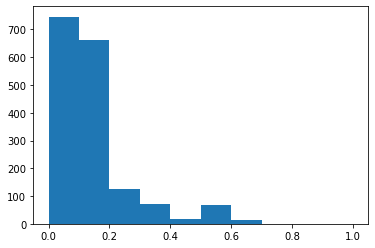

In [795]:
plt.hist(costs.flatten())

In [802]:
slabel_list = ['acceptance']
tlabel_list = ['accepted contribution']
costs, wd = maponto.WD_between_labels(slabel_list, tlabel_list, embs_model)
wd

1.0

In [803]:
costs

array([[1.]], dtype=float32)

# Properties

In [685]:
sobject_uris = mapneighbor.extract_objectProperty_domain_range_uris(source_graph)
sobject_clnd_uris = maponto.clean_labels(sobject_uris)
tobject_uris = mapneighbor.extract_objectProperty_domain_range_uris(target_graph)
tobject_clnd_uris = maponto.clean_labels(tobject_uris)

In [679]:
importlib.reload(maponto)
importlib.reload(mapneighbor)

INFO:root:logging info test


<module 'OTNeighborhood_TDA' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTNeighborhood_TDA.py'>

In [680]:
mapneighbor.extract_objectProperty_domain_range_uris(source_graph)

,label,uri
0,Administrator acceptPaper Paper,http://cmt#acceptPaper
1,Paper acceptedBy Administrator,http://cmt#acceptedBy
2,Administrator addProgramCommitteeMember Progra...,http://cmt#addProgramCommitteeMember
3,ProgramCommitteeMember addedBy Administrator,http://cmt#addedBy
4,Reviewer adjustBid Bid,http://cmt#adjustBid
5,Bid adjustedBy Reviewer,http://cmt#adjustedBy
6,Reviewer assignExternalReviewer ExternalReviewer,http://cmt#assignExternalReviewer
7,Administrator assignReviewer Reviewer,http://cmt#assignReviewer
8,Reviewer assignedByAdministrator Administrator,http://cmt#assignedByAdministrator
9,ExternalReviewer assignedByReviewer Reviewer,http://cmt#assignedByReviewer


In [683]:
importlib.reload(maponto)
importlib.reload(mapneighbor)
importlib.reload(otmapper)

INFO:root:logging info test


<module 'OTMapper' from '/home/ubuntu/django/otmaponto/match/ontology_mapping/src/OTMapper.py'>

In [684]:
mapneighbor.extract_datatypeProperty_domain_uris(source_graph)

,label,uri
0,Conference acceptsHardcopySubmissions,http://cmt#acceptsHardcopySubmissions
1,Conference date,http://cmt#date
2,Person email,http://cmt#email
3,Conference logoURL,http://cmt#logoURL
4,ProgramCommitteeMember maxPapers,http://cmt#maxPapers
5,Paper paperID,http://cmt#paperID
6,Conference reviewsPerPaper,http://cmt#reviewsPerPaper
7,Conference siteURL,http://cmt#siteURL
8,Paper title,http://cmt#title


In [686]:
sobject_clnd_uris

,label,uri,clndLabel
0,Administrator acceptPaper Paper,http://cmt#acceptPaper,administrator accept paper paper
1,Paper acceptedBy Administrator,http://cmt#acceptedBy,paper accepted administrator
2,Administrator addProgramCommitteeMember Progra...,http://cmt#addProgramCommitteeMember,administrator add program committee member pro...
3,ProgramCommitteeMember addedBy Administrator,http://cmt#addedBy,program committee member added administrator
4,Reviewer adjustBid Bid,http://cmt#adjustBid,reviewer adjust bid bid
5,Bid adjustedBy Reviewer,http://cmt#adjustedBy,bid adjusted reviewer
6,Reviewer assignExternalReviewer ExternalReviewer,http://cmt#assignExternalReviewer,reviewer assign external reviewer external rev...
7,Administrator assignReviewer Reviewer,http://cmt#assignReviewer,administrator assign reviewer reviewer
8,Reviewer assignedByAdministrator Administrator,http://cmt#assignedByAdministrator,reviewer assigned administrator administrator
9,ExternalReviewer assignedByReviewer Reviewer,http://cmt#assignedByReviewer,external reviewer assigned reviewer reviewer


In [690]:
obj_align = maponto.match_label_embeddings_OT(sobject_clnd_uris, tobject_clnd_uris, embs_model, \
                        maponto.make_mappings_topn, 1, None)

INFO:root:Matching Label Embeddings by Optimal Transport...
INFO:root:Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:The shape of the cost matrix is (48, 40)
INFO:root:Computing Optimal Transport Plan...
INFO:root:Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:The Sinkhorn got warnings. Computing Wasserstein distance by the EMD algorithm...
INFO:root:Making Top_n Mappings from the Optimal Transport Plan...


In [691]:
obj_align[obj_align.source_label == 'assignExternalReviewer']

,source,source_label,target,target_label


In [692]:
maponto.evaluate(obj_align, refs_url)

Total number of references is 15
Total correctly predicted alignments is 1
Total number of predicted is 48
Precision is 0.020833333333333332
Recall is 0.06666666666666667
F1-Measure is 0.031746031746031744


In [700]:
maponto.evaluate_against_refs(refs_df, obj_align)

,source_refs,target_refs,source_preds,target_preds,source_label_preds,target_label_preds
1_match,http://cmt#assignedByReviewer,http://conference#invited_by,http://cmt#assignedByReviewer,http://conference#invited_by,ExternalReviewer assignedByReviewer Reviewer,Reviewer invited_by Reviewer
2_nomatch,http://cmt#assignExternalReviewer,http://conference#invites_co-reviewers,http://cmt#assignExternalReviewer,http://conference#has_a_review_expertise,Reviewer assignExternalReviewer ExternalReviewer,Submitted_contribution has_a_review_expertise ...
3_ref_only,http://cmt#Conference,http://conference#Conference_volume,NaN,NaN,NaN,NaN
3_ref_only,http://cmt#Chairman,http://conference#Chair,NaN,NaN,NaN,NaN
3_ref_only,http://cmt#ProgramCommittee,http://conference#Program_committee,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
4_pred_only,NaN,NaN,http://cmt#hasAuthor,http://conference#has_authors,Paper hasAuthor Author,Conference_document has_authors Person
4_pred_only,NaN,NaN,http://cmt#hasBeenAssigned,http://conference#has_a_steering_committee,Reviewer hasBeenAssigned Paper,Conference_volume has_a_steering_committee Ste...
4_pred_only,NaN,NaN,http://cmt#hasBid,http://conference#was_a_committee_chair_of,Paper hasBid Bid,Chair was_a_committee_chair_of Committee
4_pred_only,NaN,NaN,http://cmt#detailsEnteredBy,http://conference#is_given_by,Conference detailsEnteredBy Administrator,Presentation is_given_by Active_conference_par...


In [693]:
sdatatype_uris = mapneighbor.extract_datatypeProperty_domain_uris(source_graph)
sdatatype_clnd_uris = maponto.clean_labels(sdatatype_uris)
tdatatype_uris = mapneighbor.extract_datatypeProperty_domain_uris(target_graph)
tdatatype_clnd_uris = maponto.clean_labels(tdatatype_uris)

In [697]:
datatype_align = maponto.match_label_embeddings_OT(sdatatype_clnd_uris, tdatatype_clnd_uris, embs_model, \
                        maponto.make_mappings_topn, 1, None)

INFO:root:Matching Label Embeddings by Optimal Transport...
INFO:root:Computing the Ground Embedding Costs between the Source and Target Points...
INFO:root:The shape of the cost matrix is (9, 15)
INFO:root:Computing Optimal Transport Plan...
INFO:root:Computing Wasserstein distance by the Sinkhorn algorithm...
INFO:root:The Sinkhorn got warnings. Computing Wasserstein distance by the EMD algorithm...
INFO:root:Making Top_n Mappings from the Optimal Transport Plan...


In [698]:
datatype_align[datatype_align.source_label == 'email']

,source,source_label,target,target_label


In [699]:
maponto.evaluate(datatype_align, refs_url)

Total number of references is 15
Total correctly predicted alignments is 1
Total number of predicted is 9
Precision is 0.1111111111111111
Recall is 0.06666666666666667
F1-Measure is 0.08333333333333333


In [701]:
maponto.evaluate_against_refs(refs_df, datatype_align)

,source_refs,target_refs,source_preds,target_preds,source_label_preds,target_label_preds
1_match,http://cmt#email,http://conference#has_an_email,http://cmt#email,http://conference#has_an_email,Person email,Person has_an_email
3_ref_only,http://cmt#Conference,http://conference#Conference_volume,NaN,NaN,NaN,NaN
3_ref_only,http://cmt#assignExternalReviewer,http://conference#invites_co-reviewers,NaN,NaN,NaN,NaN
3_ref_only,http://cmt#assignedByReviewer,http://conference#invited_by,NaN,NaN,NaN,NaN
3_ref_only,http://cmt#SubjectArea,http://conference#Topic,NaN,NaN,NaN,NaN
3_ref_only,http://cmt#ProgramCommittee,http://conference#Program_committee,NaN,NaN,NaN,NaN
3_ref_only,http://cmt#Review,http://conference#Review,NaN,NaN,NaN,NaN
3_ref_only,http://cmt#Document,http://conference#Conference_document,NaN,NaN,NaN,NaN
3_ref_only,http://cmt#Chairman,http://conference#Chair,NaN,NaN,NaN,NaN
3_ref_only,http://cmt#Co-author,http://conference#Contribution_co-author,NaN,NaN,NaN,NaN


# Show Differences between Reference and Predicated Matchings

In [499]:
refs_df = maponto.load_alignments(refs_url, None)

Total number of None is 15


In [628]:
matches_nomatches = maponto.evaluate_against_refs(refs_df, ot_align)
matches_nomatches

,source_refs,target_refs,source_preds,target_preds,source_label_preds,target_label_preds
1_match,http://cmt#Review,http://conference#Review,http://cmt#Review,http://conference#Review,Review,Review
1_match,http://cmt#ProgramCommittee,http://conference#Program_committee,http://cmt#ProgramCommittee,http://conference#Program_committee,ProgramCommittee,Program_committee
1_match,http://cmt#Person,http://conference#Person,http://cmt#Person,http://conference#Person,Person,Person
1_match,http://cmt#Author,http://conference#Regular_author,http://cmt#Author,http://conference#Regular_author,Author,Regular_author
1_match,http://cmt#Document,http://conference#Conference_document,http://cmt#Document,http://conference#Conference_document,Document,Conference_document
...,...,...,...,...,...,...
4_pred_only,NaN,NaN,http://cmt#ConferenceMember,http://conference#Passive_conference_participant,ConferenceMember,Passive_conference_participant
4_pred_only,NaN,NaN,http://cmt#ConferenceMember,http://conference#Conference_proceedings,ConferenceMember,Conference_proceedings
4_pred_only,NaN,NaN,http://cmt#ConferenceMember,http://conference#Conference_announcement,ConferenceMember,Conference_announcement
4_pred_only,NaN,NaN,http://cmt#ConferenceMember,http://conference#Conference_applicant,ConferenceMember,Conference_applicant


In [632]:
(matches_nomatches.index == '1_match').sum()

11

In [642]:
matches_nomatches[(matches_nomatches.index=='4_pred_only') & \
                  (matches_nomatches.source_preds.str.contains('ProgramCommittee'))]

,source_refs,target_refs,source_preds,target_preds,source_label_preds,target_label_preds
4_pred_only,NaN,NaN,http://cmt#ProgramCommitteeChair,http://conference#Conference_announcement,ProgramCommitteeChair,Conference_announcement
4_pred_only,NaN,NaN,http://cmt#ProgramCommitteeChair,http://conference#Conference_proceedings,ProgramCommitteeChair,Conference_proceedings
4_pred_only,NaN,NaN,http://cmt#ProgramCommitteeChair,http://conference#Conference_volume,ProgramCommitteeChair,Conference_volume
4_pred_only,NaN,NaN,http://cmt#ProgramCommitteeChair,http://conference#Conference_part,ProgramCommitteeChair,Conference_part
4_pred_only,NaN,NaN,http://cmt#ProgramCommitteeChair,http://conference#Conference_contribution,ProgramCommitteeChair,Conference_contribution
4_pred_only,NaN,NaN,http://cmt#ProgramCommitteeChair,http://conference#Conference_applicant,ProgramCommitteeChair,Conference_applicant
4_pred_only,NaN,NaN,http://cmt#ProgramCommitteeChair,http://conference#Organizing_committee,ProgramCommitteeChair,Organizing_committee
4_pred_only,NaN,NaN,http://cmt#ProgramCommitteeChair,http://conference#Workshop,ProgramCommitteeChair,Workshop
4_pred_only,NaN,NaN,http://cmt#ProgramCommitteeChair,http://conference#Committee,ProgramCommitteeChair,Committee
4_pred_only,NaN,NaN,http://cmt#ProgramCommitteeChair,http://conference#Steering_committee,ProgramCommitteeChair,Steering_committee
